In [51]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/383523/lesson_3_data__1_.csv', encoding = 'windows-1251')

In [3]:
df.head

<bound method NDFrame.head of        Unnamed: 0                     tk    pl         dia        hs  \
0            1242     120071109002055793     1  2007/11/09  0.505729   
1            1243     120070601004053633     1  2007/06/01  0.588519   
2            1244     120070928004076410     1  2007/09/28  0.785498   
3            1245     120070616003074261     1  2007/06/16  0.550961   
4            1246     120070519001018477     1  2007/05/19  0.804954   
...           ...                    ...   ...         ...       ...   
48124     5142333  660820070702005033693  6608  2007/07/02  0.575660   
48125     5142335  660820070618006015969  6608  2007/06/18  0.829954   
48126     5150526  670120071110001433949  6701  2007/11/10  0.384120   
48127     5150527  670120071110001433949  6701  2007/11/10  0.384120   
48128     5150586  670220071001001404096  6702  2007/10/01  0.391262   

               tc        cta  id_art  id_subsubfam   id_subfam  ...   id_famn  \
0       110000761   1100

In [4]:
user_df = df[['tc', 'art_sp']]

In [5]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [6]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [7]:
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [8]:
brand_name = 'MARAVILLA 500 G Store_Brand'

In [10]:
brand_name.split()[-1]

'Store_Brand'

In [12]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [13]:
split_brand('MARAVILLA 500 G Store_Brand')

'Store_Brand'

In [15]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [17]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [18]:
user_df.brand_info.apply(lambda x: x.split(' ')[-1])

0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
            ...     
48124        Brand_4
48125        Brand_4
48126    Store_Brand
48127    Store_Brand
48128    Store_Brand
Name: brand_info, Length: 48129, dtype: object

In [31]:
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [27]:
users_purchases.purchases.median()

2.0

In [28]:
users_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [30]:
 users_purchases = user_df.groupby('user_id', as_index=False).agg({'brand_name': 'count'}).rename(columns={'brand_name': 'purchases'}).query('purchases >= 5')       

In [41]:
users_unique_brands = user_df.groupby('user_id', as_index=False).agg({'brand_name': pd.Series.nunique}).rename(columns={'brand_name': 'unique_brands'})

In [38]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False).agg({'brand_info': 'count'}).sort_values(['user_id', 'brand_info'], ascending = [False, False]).groupby('user_id').head(1).rename(columns={'brand_name': 'lovely_brand', 'brand_info': 'lovely_brand_purchases'})   

In [42]:
users_unique_brands

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [39]:
lovely_brand_purchases_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [45]:
loyalty_df = users_purchases.merge(users_unique_brands, on='user_id').merge(lovely_brand_purchases_df, on='user_id')

In [46]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [48]:
loyal_users= loyalty_df[loyalty_df.unique_brands == 1]

In [49]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases/loyalty_df.purchases

In [50]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


C:\Users\USER\AppData\Local\Temp\ipykernel_23332\711974570.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(loyalty_df.loyalty_score, kde=False)


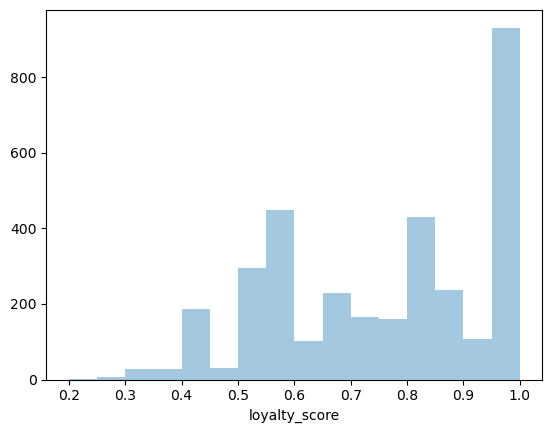

In [58]:
ax = sns.distplot(loyalty_df.loyalty_score, kde=False)

In [59]:
loyalty_df.loyalty_score.median()

0.8

In [64]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index =False).agg({'loyalty_score': 'median', 'user_id': 'count'})

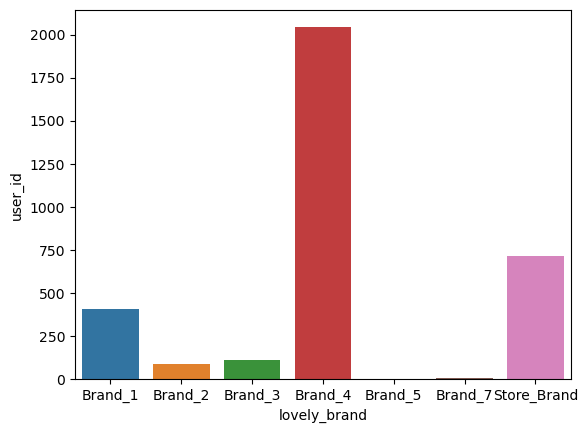

In [67]:
ax = sns.barplot(x='lovely_brand', y='user_id', data=brands_loyalty)